## 5. Aprendizaje Automátizado: Algoritmos de Clasificación Supervisada

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, root_mean_squared_error, roc_curve, auc

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr&format=csv")

In [17]:
kepler_data_clean = df.dropna().reset_index(drop=True)
kepler_clean = kepler_data_clean.drop(['kepid', 'kepoi_name'], axis=1)

print(kepler_clean)

     koi_disposition  koi_period  koi_impact  koi_duration  koi_depth  \
0          CONFIRMED    9.488036       0.146       2.95750      615.8   
1          CONFIRMED   54.418383       0.586       4.50700      874.8   
2          CANDIDATE   19.899140       0.969       1.78220    10829.0   
3     FALSE POSITIVE    1.736952       1.276       2.40641     8079.2   
4          CONFIRMED    2.525592       0.701       1.65450      603.3   
...              ...         ...         ...           ...        ...   
9196  FALSE POSITIVE    0.527699       1.252       3.22210     1579.2   
9197       CANDIDATE    1.739849       0.043       3.11400       48.5   
9198  FALSE POSITIVE    0.681402       0.147       0.86500      103.6   
9199       CANDIDATE  333.486169       0.214       3.19900      639.1   
9200  FALSE POSITIVE    4.856035       0.134       3.07800       76.7   

      koi_prad  koi_teq  koi_insol  koi_model_snr  
0         2.26    793.0      93.59           35.8  
1         2.83    4

In [22]:
kepler_clean = kepler_clean[kepler_clean['koi_disposition'] != 'CANDIDATE'].reset_index(drop=True)
kepler_clean['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [24]:
etiqueta = LabelEncoder()
kepler_clean['koi_disposition'] = etiqueta.fit_transform(kepler_clean['koi_disposition'])

In [25]:
x = kepler_clean.drop('koi_disposition', axis=1).values
y = kepler_clean['koi_disposition'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
modelo = LogisticRegression()
modelo.fit(x_train, y_train)

C:\Users\Sital\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
scores_1 = cross_val_score(modelo, x_train_scaled, y_train)
print(f'Logicstic regression score = {scores_1.mean()} +/- {scores_1.std()}')

Logicstic regression score = 0.8254019873532068 +/- 0.010845984556091141


In [35]:
y_predict_1 = modelo.predict(x_test_scaled)

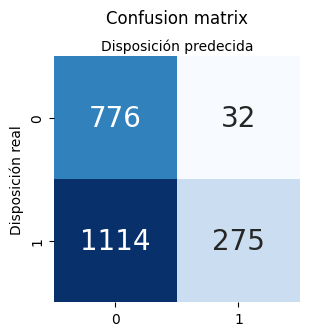

In [36]:
class_names = [0,0]
fig, ax = plt.subplots(figsize=(3,3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict_1)), annot = True, cmap="Blues", fmt='g', cbar = False, annot_kws={'size':20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Disposición real')
plt.xlabel('Disposición predecida')
plt.show()

In [37]:
print(f'Presición = {precision_score(y_test, y_predict_1)}')
print(f'Exactitud = {accuracy_score(y_test, y_predict_1)}')
print(f'Sensibilidad = {recall_score(y_test, y_predict_1)}')

Presición = 0.8957654723127035
Exactitud = 0.47837960855712336
Sensibilidad = 0.19798416126709864
